# **Neural Networks & Intelligent Systems**
## **ECE NTUA, Flow Y, 9th Semester, 2021-2022**
### *Lab 1: Supervised Learning (Classification)*
### Part 1: UCI Data

#### Team 20

## Installation of packages

In [ ]:
!pip install                --upgrade pip #upgrade pip package installer
!pip install scikit-learn   --upgrade #upgrade scikit-learn package
!pip install numpy          --upgrade #upgrade numpy package
!pip install                --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install matplotlib==3.1.3
!pip install -U imbalanced-learn

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Εισαγωγή και επισκόπηση

Η παρούσα εργασία αφορά την μελέτη και βελτιστοποίηση ταξινομητών σε σύνολα δεδομένων. Στο Part 1 μελετάται το dataset "echocardiogram" από το αποθετήριο UCI. Η εκπαιδευση και βελτιστοποίηση των ταξινομητών στο UCI dataset γίνεται αποκλειστικά με τις συναρτήσεις του skicit-learn.

#### Σύντομη παρουσίαση του dataset:

Το Echocardiogram Data Set αφορά δεδομένα για την ταξινόμηση ασθενών που θα επιβιώσουν μετά από τουλάχιστον έναν χρόνο από κάποια καρδιακή προσβολή. Προέρχεται από τον donor Steven Salzberg και τον Collector Dr. Evlin Kinney. 
Όλοι οι ασθενείς που περιγράφονται υπέφερεαν από καρδιακή προσβολή κάποια στιγμή στο παρελθόν. Κάποιοι από αυτούς είναι ακόμα ζωντανοί ενώ κάποιοι άλλοι όχι. Οι παράμετροι survival και still-alive, όταν ληφθούν υπόψιν μαζί, δείχνουν εάν ο ασθενής επιβίωσε για τουλάχιστον ένα χρόνο μετά το συμβάν. Το πρόβλημα που τίθεται αφορά το κατά πόσο μπορεί κανείς να προβλέψει από τις άλλες παραμέτρους αν θα επιβιώσει ο ασθενής για τουλάχιστον ένα ακόμα χρόνο. Το πιο δύσκολο κομμάτι είναι η σωστή πρόβλεψη ότι ο ασθενής δεν θα επιβιώσει (μέρος της δυσκολίας είναι και το μέγεθος του data set).

### Installation of libraries

In [ ]:
import pandas as pd
import numpy as np

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time

import warnings
warnings.filterwarnings('ignore')

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Διάβασμα data set

Παρακάτω, εκτός από το άνοιγμα του data set, δημιουργείται και ένα νέο αρχείο, το echocardiogram_new.data, το οποίο περιέχει όλη την πληροφορία του data set αλλά με την πρώτη γραμμή να είναι αριθμημένη για ευκολία στην χρήση στην συνέχεια. Επιπλέον, επειδή το data set έχει missing values, αντικαταστάθηκαν τα "?" με "NaN".

**Προσοχή! Μετά την εκτέλεση του παρακάτω cell, θα πρέπει manually στο echocardiogram_new.data στην γραμμή 51 να σβηστεί στην αρχή το "," και μετά να σωθεί με Ctrl+S το αρχείο πριν συνεχίσει κανείς την εκτέλεση των cells.**

In [ ]:
with open('echocardiogram.data') as data:
  with open('echocardiogram_new.data', 'w') as data_new:
    data_new.write("0,1,2,3,4,5,6,7,8,9,10,11,12\n")
    
    for line in data:
      data_new.write(line.replace('?', 'NaN'))

Μετά το διάβασμα, παρακάτω μπορεί να δει κανείς ενδεικτικά τις πρώτες γραμμές των δεδομένων καθώς και το μέγεθός του.

In [ ]:
dataset = pd.read_csv('echocardiogram_new.data')

print('Dataset dimensions:', dataset.shape)
dataset.head()

Dataset dimensions: (132, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1.0,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0


### Σχολιασμός για το Data set
Στην συνέχεια, επειδή υπάρχουν missing values, μια στρατηγική είναι η αφαίρεση των δειγμάτων (γραμμές) που έχουν χαρακτηριστικά με απουσιάζουσες τιμές ή παρόμοια τα χαρακτηριστικά αν σε κάποια δείγματα απουσιάζουν.

Επειδή τα datasets δημιουργούνται από μετρήσεις ή αντικείμενα του πραγματικού κόσμου, δεν είναι σπάνιο να υπάρχουν απουσιάζουσες τιμές κάποιων χαρακτηριστικών σε έναν αριθμό δειγμάτων. Ωστόσο, η είσοδος στους αλγόριθμους ΜΜ πρέπει να είναι πληρης. 

Παρατηρείται ότι στο CSV λείπουν τιμές οι οποίες αντικαταστάθηκαν με "NaN" ("Not A Number") όπως αναφέρθηκε παραπάνω.

Σημειώνεται ότι αυτή μεθοδολογία είναι η μόνη μορφή προεπεξεργασίας που καλύτερο είναι να γίνει πριν τον διαχωρισμό σε train και test.

Μπορεί αυτή η προσέγγιση να είναι μοιάζει απλή, ωστόσο ειδικά αν απουσιάζουν πολλές τιμές, συνήθως δεν είναι θεμιτός να θυσιαστούν δεδομένα (δείγματα) ούτε να αφαιρεθούν χαρακτηριστικά που μπορεί να περιλαμβάνουν σημαντική πληροφορία για το διαχωρισμό των κλάσσεων.

### Από το FAQ: 
Το χαρακτηριστικό εξοδου (η κλάση) είναι το 13ο “alive-at-1” οπότε διατηρούνται μόνο όσα δείγματα δεν έχουν “?” στο
“alive-at-1”. Τα χαρακτηριστικά είναι τα 3 έως 9 (τα υπόλοιπα μπορούν να αγνοηθούν). Η πρόβλεψη μπορεί να
γίνει και με τα χαρακτηριστικά 1-9 (όπως διατυπώθηκε αρχικά) απλά θα δίνει πολύ υψηλές τιμές (που δεν
προσφέρονται για πολύ περεταίρω βελτιστοποίηση) γιατί υπάρχει μεγάλη συσχέτιση (αν και όχι απόλυτη) μεταξύ
των χαρακτηριστικών 1 και 2 και της μεταβλητής εξόδου. Οι κολόνες 1-9 είναι τα χαρακτηριστικά εισόδου (έχουμε αφαιρέσει τα 3 άχρηστα
αρχικά χαρακτηριστικά) και η 10η κολόνα είναι η έξοδος. Τιμές κοντά στο -1 ή στο 1 δείχνουν υψηλή συσχέτιση,
αντίστροφη (-1) ή ανάλογη (1).

### Περαιτέρω Σχολιασμός

Λαμβάνοντας υπόψιν τα παραπάνω, αρχικά τα missing δεδομένα διαγράφηκαν τελείως και προέκυψαν 61 rows. Όμως, για καλύτερα αποτελέσματα προτιμήθηκε με βάση τις οδηγίες του FAQ η μέθοδος που φαίνεται στην συνέχεια ώστε να διατηρηθούν 74 rows χρησιμοποιώντας και τον μετασχηματιστή “[Imputer](http://scikit-learn.org/stable/modules/impute.html)” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές) του χαρακτηριστικού στο train set.

Έτσι, σύμφωνα με τα προηγούμενα, στο ακόλουθο cell φαίνεται η διαδικασία με την οποία μετονομάστηκε το NaN σε null σε ολες τις στήλες εκτός της 12ης και μετά ενώθηκε ξανά.

In [ ]:
dataset_n = pd.concat([dataset.iloc[:, :12].replace(np.NaN, 'null'), dataset.iloc[:, [12]]], axis=1).dropna(axis=0)

dataset_n

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.26,9,4.6,14,1,1,name,1,0.0
1,19,0,72,0,0.38,6,4.1,14,1.7,0.588,name,1,0.0
2,16,0,55,0,0.26,4,3.42,14,1,1,name,1,0.0
3,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,name,1,0.0
4,19,1,57,0,0.16,22,5.75,18,2.25,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1.25,1,63,0,0.3,6.9,3.52,18.16,1.51,0.857,name,2,1.0
105,24,0,59,0,0.17,14.3,5.49,13.5,1.5,0.643,name,2,0.0
106,25,0,57,0,0.228,9.7,4.29,11,1,0.786,name,2,0.0
108,0.75,1,78,0,0.23,40,6.23,14,1.4,0.714,name,2,1.0


Έπειτα, αντικαταστάθηκε το null ξανά σε NaN.

In [ ]:
dataset_clear = dataset_n.replace('null', np.NaN)

dataset_clear

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11.00,0.0,71.0,0.0,0.260,9.000,4.600,14.00,1.00,1.000,name,1.0,0.0
1,19.00,0.0,72.0,0.0,0.380,6.000,4.100,14.00,1.70,0.588,name,1.0,0.0
2,16.00,0.0,55.0,0.0,0.260,4.000,3.420,14.00,1.00,1.000,name,1.0,0.0
3,57.00,0.0,60.0,0.0,0.253,12.062,4.603,16.00,1.45,0.788,name,1.0,0.0
4,19.00,1.0,57.0,0.0,0.160,22.000,5.750,18.00,2.25,0.571,name,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1.25,1.0,63.0,0.0,0.300,6.900,3.520,18.16,1.51,0.857,name,2.0,1.0
105,24.00,0.0,59.0,0.0,0.170,14.300,5.490,13.50,1.50,0.643,name,2.0,0.0
106,25.00,0.0,57.0,0.0,0.228,9.700,4.290,11.00,1.00,0.786,name,2.0,0.0
108,0.75,1.0,78.0,0.0,0.230,40.000,6.230,14.00,1.40,0.714,name,2.0,1.0


Ύστερα, απομονώθηκαν τα features που χρειάζονται με βάση το FAQ.

In [ ]:
features = dataset_clear.iloc[:, 2:9]

features

,2,3,4,5,6,7,8
0,71.0,0.0,0.260,9.000,4.600,14.00,1.00
1,72.0,0.0,0.380,6.000,4.100,14.00,1.70
2,55.0,0.0,0.260,4.000,3.420,14.00,1.00
3,60.0,0.0,0.253,12.062,4.603,16.00,1.45
4,57.0,0.0,0.160,22.000,5.750,18.00,2.25
...,...,...,...,...,...,...,...
104,63.0,0.0,0.300,6.900,3.520,18.16,1.51
105,59.0,0.0,0.170,14.300,5.490,13.50,1.50
106,57.0,0.0,0.228,9.700,4.290,11.00,1.00
108,78.0,0.0,0.230,40.000,6.230,14.00,1.40


Τελικά, για τις απουσιάζουσες πληροφορίες γίνεται ο υπολογισμός της mean με τον imputer.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values = np.NaN, strategy='mean')

features_clear = pd.DataFrame(imp.fit_transform(features))
features_clear.columns = features.columns
features_clear.index = features.index

# ενδεικτικά, τυπώνονται κάποιες σειρές
features_clear.iloc[30:60, :]

,2,3,4,5,6,7,8
40,54.000000,0.0,0.350000,9.300000,3.630000,11.000000,1.222000
41,70.000000,1.0,0.270000,4.700000,4.490000,22.000000,2.000000
42,79.000000,0.0,0.150000,17.500000,4.270000,13.000000,1.300000
43,56.000000,0.0,0.330000,12.576636,3.590000,14.000000,1.000000
46,81.000000,0.0,0.120000,12.576636,4.785912,9.000000,1.250000
47,59.000000,0.0,0.030000,21.300000,6.290000,17.000000,1.310000
48,63.000000,1.0,0.219057,12.576636,4.785912,23.000000,2.300000
50,56.000000,1.0,0.040000,14.000000,5.000000,15.348082,1.433795
51,61.000000,1.0,0.270000,12.576636,4.785912,9.000000,1.500000
53,58.000000,0.0,0.300000,9.400000,3.490000,14.000000,1.000000


Μετά, γίνεται ο διαχωρισμός των features και labels.

In [ ]:
np_features = features_clear.values

np_features

array([[7.10000000e+01, 0.00000000e+00, 2.60000000e-01, 9.00000000e+00,
        4.60000000e+00, 1.40000000e+01, 1.00000000e+00],
       [7.20000000e+01, 0.00000000e+00, 3.80000000e-01, 6.00000000e+00,
        4.10000000e+00, 1.40000000e+01, 1.70000000e+00],
       [5.50000000e+01, 0.00000000e+00, 2.60000000e-01, 4.00000000e+00,
        3.42000000e+00, 1.40000000e+01, 1.00000000e+00],
       [6.00000000e+01, 0.00000000e+00, 2.53000000e-01, 1.20620000e+01,
        4.60300000e+00, 1.60000000e+01, 1.45000000e+00],
       [5.70000000e+01, 0.00000000e+00, 1.60000000e-01, 2.20000000e+01,
        5.75000000e+00, 1.80000000e+01, 2.25000000e+00],
       [6.80000000e+01, 0.00000000e+00, 2.60000000e-01, 5.00000000e+00,
        4.31000000e+00, 1.20000000e+01, 1.00000000e+00],
       [6.20000000e+01, 0.00000000e+00, 2.30000000e-01, 3.10000000e+01,
        5.43000000e+00, 2.25000000e+01, 1.87500000e+00],
       [6.00000000e+01, 0.00000000e+00, 3.30000000e-01, 8.00000000e+00,
        5.25000000e+00, 1

In [ ]:
labels = dataset_clear.iloc[:, [12]]

labels

,12
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
104,1.0
105,0.0
106,0.0
108,1.0


Τέλος, εφαρμόζεται flatten για να προκύψει ο ακόλουθος πίνακας.

In [ ]:
np_labels = labels.values.flatten()

print(np_labels.shape)
np_labels

(74,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1.])

Έτσι, συνοπτικά, τα δεδομένα θα είναι τα εξής:

In [ ]:
print('classes:', len(set(list(np_labels))))
print("")

df = pd.Series(np_labels).value_counts().sort_index().reset_index()
df.columns = ['Value', 'Plithos']
df['Frequency'] = df['Plithos']/df['Plithos'].sum()
print(df.to_string(index = False))
print("")

ratio = df['Plithos'].max()/df['Plithos'].min()
print("Larger class is", ratio, "times bigger than the smaller one")
print("")

if ratio < 1.5:
    print('Dataset: Balanced')
else:
    print('Dataset: Not balanced')

classes: 2

 Value  Plithos  Frequency
   0.0       50   0.675676
   1.0       24   0.324324

Larger class is 2.0833333333333335 times bigger than the smaller one

Dataset: Not balanced


### Σχολιασμός

Για το data set είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη.

Το dataset είναι binary, καθώς υπάρχουν δύο κλάσεις. Αυτό εξυπηρετεί και τον υπολογισμό του f1-score για να μην χρειάζεται η παράμετρος macro στο f1_score, κάτι που χρησιμοποιείται σε multiclass datasets. Σημειώνεται όμως ότι έτσι θα είναι πιο σωστές οι συγκρίσεις αν και δεν σχετίζεται με τη βελτιστοποίηση.

## Προετοιμασία

Αρχικά, γίνεται ο διαχωρισμός του συνόλου δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set.

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.3)
print(train.shape,test.shape)

(51, 7) (23, 7)


## Ταξινόμηση

### Ταξινομητές

Στο UCI εξετάζονται οι ταξινομητές:

>dummy

>Gaussian Naive Bayes (GNB)

>KNeirestNeighbors (kNN)

>Logistic Regression (LR)

### Μετρικές

Η βελτιστοποίηση και η παρουσίαση των αποτελεσμάτων γίνεται ξεχωριστά για δύο μετρικές:

>ορθότητα (accuracy)

>F1-score (macro σε προβλήματα multiclass)

### Σχήμα διασταυρούμενης επικύρωσης

Για όλα τα πειράματα θα χρησιμοποιείται 10-fold cross-validation.

### Επίδοση out-of-the-box

Στην συνέχεια, φαίνεται η συμπεριφορά των ταξινομητών χωρίς καμία βελτιστοποίηση (out-of-the-box) και με όλες τις παραμέτρους σε default τιμές.
Όλοι οι εκτιμητές εκπαιδεύονται με ένα απλό fit σε ολόκληρο το training set και υπολογίζεται η επίδοσή τους στο test set για τις δύο μετρικές. Τέλος, παρουσιάζεται συνοπτικά και συγκριτικά την επιδοσή τους:
1. σε πίνακα markdown
2. σε bar plot σύγκρισης

και σχολιάζεται η επίδοσή τους.

### **Dummy Classifier**

Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform =       DummyClassifier(strategy = "uniform")
dc_constant_0 =    DummyClassifier(strategy = "constant", constant=0)
dc_constant_1 =    DummyClassifier(strategy = "constant", constant=1)
dc_most_frequent = DummyClassifier(strategy = "most_frequent")
dc_stratified =    DummyClassifier(strategy = "stratified")

Με τη μέθοδο fit εκπαιδεύεται ο ταξινομητής στο σύνολο εκπαίδευσης.

In [ ]:
model_uniform =       dc_uniform.fit(train, train_labels)
model_constant_0 =    dc_constant_0.fit(train, train_labels)
model_constant_1 =    dc_constant_1.fit(train, train_labels)
model_most_frequent = dc_most_frequent.fit(train, train_labels)
model_stratified =    dc_stratified.fit(train, train_labels)

Με τη μέθοδο predict παράγονται προβλέψεις για τα δεδομένα ελέγχου.

In [ ]:
pred_uniform = dc_uniform.predict(test)
print(pred_uniform)

[0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.]


In [ ]:
pred_constant_0 = dc_constant_0.predict(test)
print(pred_constant_0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
pred_constant_1 = dc_constant_1.predict(test)
print(pred_constant_1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
pred_most_frequent = dc_most_frequent.predict(test)
print(pred_most_frequent)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
pred_stratified = dc_stratified.predict(test)
print(pred_stratified)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


### Accuracy (Ορθότητα)

Για την αξιολόγηση, το πιο απλό κριτήριο είναι η σύγκριση του ποσοστού ομοιότητας των πίνακων preds και test_labels. Το κριτήριο αυτό ονομάζεται ορθότητα (accuracy). Αν το κάναμε manually, για κάθε στοιχείο (δείγμα) των πινάκων που είναι όμοιο (0 και 0 ή 1 και 1) αυξάνουμε έναν μετρητή. Στην περίπτωση που είναι ανόμοια δεν τον αυξάνουμε. Διαιρούμε την τελική τιμή του μετρητή με το πλήθος των στοιχείων του πίνακα. Το προηγούμενο for loop μας το δίνει έτοιμο η συνάρτηση accuracy_score.

In [ ]:
from sklearn.metrics import accuracy_score

print("Uniform:")
print(accuracy_score(test_labels, pred_uniform))
print(dc_uniform.score(test, test_labels))
print("")
print("Constant 0:")
print(accuracy_score(test_labels, pred_constant_0))
print(dc_constant_0.score(test, test_labels))
print("")
print("Constant 1:")
print(accuracy_score(test_labels, pred_constant_1))
print(dc_constant_1.score(test, test_labels))
print("")
print("Most Frequent:")
print(accuracy_score(test_labels, pred_most_frequent))
print(dc_most_frequent.score(test, test_labels))
print("")
print("Stratified:")
print(accuracy_score(test_labels, pred_stratified))
print(dc_stratified.score(test, test_labels))

Uniform:
0.6086956521739131
0.34782608695652173

Constant 0:
0.6086956521739131
0.6086956521739131

Constant 1:
0.391304347826087
0.391304347826087

Most Frequent:
0.6086956521739131
0.6086956521739131

Stratified:
0.5217391304347826
0.5217391304347826


### Σχολιασμός
Παρατηρείται ότι αν τρέξουμε το πρoηγούμενο κελί διαδοχικές φορές, το δεύτερο accuracy αλλάζει γιατί καλούμε εκ νέου τον ταξινομητή να κάνει (τυχαίες) προβλέψεις. Επομένως, επιλέγεται η αποθήκευση της ορθότητας όλων των dummy classifiers σε ένα λεξικό και η αποτύπωση από την καλύτερη στη χειρότερη.

In [ ]:
from sklearn.metrics import accuracy_score

class_accuracy = {}
class_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)

model = dc_constant_0.fit(train, train_labels)
class_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)

model = dc_constant_1.fit(train, train_labels)
class_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)

model = dc_most_frequent.fit(train, train_labels)
class_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)

model = dc_stratified.fit(train, train_labels)
class_accuracy['stratified'] = dc_stratified.score(test, test_labels)

print("Classification Accuracy on the Dummy Classifier on the Echocardiogram Dataset (30% test set)\n")
sorted_accuracy = [(k, class_accuracy[k]) for k in sorted(class_accuracy, key=class_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k, v)

Classification Accuracy on the Dummy Classifier on the Echocardiogram Dataset (30% test set)

constant 0 0.6086956521739131
most frequent label 0.6086956521739131
stratified 0.6086956521739131
uniform (random) 0.43478260869565216
constant 1 0.391304347826087


### F1-Score

In [ ]:
from sklearn.metrics import f1_score

class_f1 = {}
class_f1['uniform (random)'] = f1_score(test_labels, pred_uniform)

model = dc_constant_0.fit(train, train_labels)
class_f1['constant 0'] = f1_score(test_labels, pred_constant_0)

model = dc_constant_1.fit(train, train_labels)
class_f1['constant 1'] = f1_score(test_labels, pred_constant_1)

model = dc_most_frequent.fit(train, train_labels)
class_f1['most frequent label'] = f1_score(test_labels, pred_most_frequent)

model = dc_stratified.fit(train, train_labels)
class_f1['stratified'] = f1_score(test_labels, pred_stratified)

print("Classification F1-Score on the Dummy Classifier on the Echocardiogram Dataset (30% test set)\n")
sorted_f1_score = [(k, class_f1[k]) for k in sorted(class_f1, key=class_f1.get, reverse=True)]
for k, v in sorted_f1_score:
  print(k, v)

Classification F1-Score on the Dummy Classifier on the Echocardiogram Dataset (30% test set)

uniform (random) 0.5714285714285715
constant 1 0.5625
stratified 0.15384615384615383
constant 0 0.0
most frequent label 0.0


### **Gaussian Naive Bayes (GNB) Classifier**

H βασική ιδέα λειτουργίας του ταξινομητή είναι:

α) ο γνωστός νόμος του Bayes $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

β) η (naive) υπόθεση ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους (δεν ισχύει γενικά, αλλά ο ταξινομητής είναι πρακτικά καλός σε πολλές περιπτώσεις). 

Παράδειγμα: θα βρέξει σήμερα? Naive Bayes: "Θα το προβλέψω με βάση το παρελθόν θεωρώντας ότι τα χαρακτηριστικά θερμοκρασία, νεφοκάλυψη και ατμοσφαιρική πίεση είναι όλα ανεξάρτητα μεταξύ τους".

Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$
Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) =  \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$
αυτό οδηγεί στην απλοποίηση
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$
Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το δεξί μέλος της σχέσης.

Θέλουμε να δοκιμάσουμε τον Naive Bayes στο Echocardiogram. Εδώ όμως έχουμε συνεχείς μεταβλητές. Όπως είπαμε θα πρέπει να κάνουμε μια υπόθεση για την κατανομή $P(x_i \mid y)$. Θα θεωρήσουμε ότι η κατανομή κάθε χαρακτηριστικού ως προς κάθε κλάση ακολουθεί την κανονική κατανομή:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$
Ο συγκεκριμένος ταξινομητής είναι ο Gaussian Naive Bayes. Πρακτικά, με τα δεδομένα του training set, για κάθε κλάση υπολογίζουμε τη μέση τιμή $\mu_y$ και τη διακύμανση $\sigma^2_y$ κάθε χαρακτηριστικού για τη συγκεκριμένη κλάση. 
Πρακτικά, όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set)είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνια του χαρκτηριστικού και αντιθετοαντίστροφα.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
pred_gnb = gnb.predict(test)

### Accuracy (Ορθότητα)

In [ ]:
class_accuracy['gnb'] = gnb.score(test, test_labels)
print("Classification Accuracy on the Gaussian Naive Bayes (GNB) Classifier on the Echocardiogram Dataset (30% test set)\n")
print(gnb.score(test, test_labels))
print("")

sorted_accuracy = [(k, class_accuracy[k]) for k in sorted(class_accuracy, key=class_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k, v)

Classification Accuracy on the Gaussian Naive Bayes (GNB) Classifier on the Echocardiogram Dataset (30% test set)

0.6956521739130435

gnb 0.6956521739130435
constant 0 0.6086956521739131
most frequent label 0.6086956521739131
stratified 0.6086956521739131
uniform (random) 0.43478260869565216
constant 1 0.391304347826087


### F1-Score

In [ ]:
class_f1['gnb'] = f1_score(test_labels, pred_gnb)
print("Classification F1-Score on the Gaussian Naive Bayes (GNB) Classifier on the Echocardiogram Dataset (30% test set)\n")
print(f1_score(test_labels, pred_gnb))
print("")

sorted_f1_score = [(k, class_f1[k]) for k in sorted(class_f1, key=class_f1.get, reverse=True)]
for k, v in sorted_f1_score:
  print(k, v)

Classification F1-Score on the Gaussian Naive Bayes (GNB) Classifier on the Echocardiogram Dataset (30% test set)

0.5333333333333333

uniform (random) 0.5714285714285715
constant 1 0.5625
gnb 0.5333333333333333
stratified 0.15384615384615383
constant 0 0.0
most frequent label 0.0


## Θεωρία
O Gaussian Naive Bayes είναι ένας παραμετρικός ταξινομητής. Οι παραμετρικοί ταξινομητές κάνουν κάποια υπόθεση για την κατανομή (των χαρακτηριστικών) των δεδομένων και την προσδιορίζουν μέσω παραμέτρων. Στην περίπτωση του Gaussian Naive Bayes, η υπόθεση είναι η κανονική κατανομή και οι παράμετροι είναι τα $μ$ και $σ^2$ των χαρακτηριστικών. Αντίθετα, οι μη-παραμετρικές μέθοδοι δεν κάνουν καμία υπόθεση για την κατανομή των δεδομένων. Προσοχή: και οι μη-παραμετρικοί ταξινομητές έχουν παραμέτρους (και πάρα πολλές σε ορισμένες περιπτώσεις, τα βάρη των νευρωνικών για παράδειγμα) που επηρ
εάζουν τη λειτουργία τους αλλά δεν σχετίζονται με κάποια υπόθεση κατανομής για τα δεδομένα. 

Σε γενικές γραμμές οι παραμετρικοί ταξινομητές είναι απλούστεροι, ταχύτεροι στις φάσεις train/test και χρειάζονται λιγότερα δεδομένα εκπαίδευσης. Από την άλλη, έχουν γενικά μικρότερη χωρητικότητα (capacity), δηλαδή μπορούν να διαχωρίσουν τις κλάσεις σε προβλήματα σχετικά μικρότερων διαστάσεων ενώ η απαίτηση τα πραγματικά δεδομένα να ακολουθούν μια ακριβή κατανομή είναι πολύ ισχυρή και δεν επαληθεύεται πρακτικά. Αντιστρόφως, οι μη παραμετρικοί ταξινομητές είναι πιο αργοί στην εκπαίδευση, έχουν γενικά μεγαλύτερες απαιτήσεις χώρου/μνήμης και χρειάζονται περισσότερα δεδομένα αλλά έχουν μεγαλύτερη χωρητικότητα, μπορούν να μάθουν δυσκολότερα προβλήματα και να έχουν καλύτερη απόδοση σε μεγαλύτερα datasets. 

Οι μη παραμετρικοί ταξινομητές μπορούν να εμφανίσουν επίσης εντονότερα το πρόβλημα της υπερεκπαίδευσης (overfitting), δηλαδή να προσαρμοστούν υπερβολικά στα δεδομένα εκπαίδευσης και να μειωθεί η ικανότητα γενίκευσης (generalisation) τους σε νέα δείγματα. Γενικά στη φάση της εκπαίδευσης προσπαθούμε να επιτύχουμε μια καλή ισορροπία μεταξυ της απόκλισης (bias) και της διακύμανσης (variance) από τις πραγματικές τιμές.

![Bias-Variance trade off](https://cdn-images-1.medium.com/proxy/1*e4Kn-_M_KN2bw-e6kevywA.png "Bias-Variance trade off")


Ένα παράδειγμα μη-παραμετρικού ταξινομητή που θα εξετάσουμε είναι ο kNN (k-Nearest-Neighbours).

## **k-Neirest Neighbors (kNN) Classifier**
O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).
# Υπερπαράμετρος k
Το k της γειτονιάς του kNN είναι μια υπερπαράμετρος του ταξινομητή. Μια άλλη υπερπαράμετρος για παράδειγμα είναι η συνάρτηση της απόστασης. Οι υπερπαράμετροι είναι επιλογές που γίνονται από τον σχεδιαστή του συστήματος και δεν μπορούμε να ξέρουμε τις βέλτιστες τιμές τους αν πρώτα δεν τις αξιολογήσουμε εμπειρικά σε δεδομένα.  Ένα άλλο παράδειγμα υπερπαραμέτρου είναι ο αριθμός των κρυφών νευρώνων σε ένα MLP. Στην περίπτωση του kNN το k ελέγχει το trade-off μεταξύ μεταξύ απόκλισης και διακύμνανσης.

Έαν θέσουμε μικρό k, πχ k=1 παίρνουμε ένα ταξινομητή με υψηλή διακύμανση και χαμηλή απόκληση. Ο ταξινομητής τείνει να αγνοεί τη συνολική κατανομή και αποφασίζει μόνο από το κοντινότερο δείγμα. Στην περίπτωση k=1 το σύνορο απόφασης (decision boundary) περνά από τις μεσοκάθετους γειτονικών δειγμάτων διαφορετικής κλάσης. 

![kNN k=1](https://i.stack.imgur.com/UG81y.png "kNN with k=1")

Αν διαλέξουμε μεγαλύτερο k, φτιάχνουμε ένα ταξινομητή με χαμηλότερη διακύμανση και υψηλότερη απόκλιση. Θα ταξινομίσει λάθος περισσότερα αποκλίνοντα δείγματα (outliers) αλλά θα σέβεται περισσότερο τη συνολική κατανομή.
![kNN k=20](https://i.stack.imgur.com/FZITG.png "kNN with k=20")

Επιλέγεται τυχαία τιμή για την υπερπαράμετρο k=5, ώστε να εκπαιδευτεί ο kNN classifier.

In [ ]:
# Load KNN and organize data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn.fit(train, train_labels)
pred_knn = knn.predict(test)

### Accuracy (Ορθότητα)

In [ ]:
print("Classification Accuracy on the k-Neirest Neighbors (kNN) Classifier on the Echocardiogram Dataset (30% test set)\n")
class_accuracy['knn'] = knn.score(test, test_labels)
print(accuracy_score(test_labels, pred_knn))
print("")

sorted_accuracy = [(k, class_accuracy[k]) for k in sorted(class_accuracy, key=class_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k, v)

Classification Accuracy on the k-Neirest Neighbors (kNN) Classifier on the Echocardiogram Dataset (30% test set)

0.6956521739130435

gnb 0.6956521739130435
knn 0.6956521739130435
constant 0 0.6086956521739131
most frequent label 0.6086956521739131
stratified 0.6086956521739131
uniform (random) 0.43478260869565216
constant 1 0.391304347826087


### F1-Score

In [ ]:
class_f1['knn'] = f1_score(test_labels, pred_knn)
print("Classification F1-Score on the k-Neirest Neighbors (kNN) Classifieron on the Echocardiogram Dataset (30% test set)\n")
print(f1_score(test_labels, pred_knn))
print("")

sorted_f1_score = [(k, class_f1[k]) for k in sorted(class_f1, key=class_f1.get, reverse=True)]
for k, v in sorted_f1_score:
  print(k, v)

Classification F1-Score on the k-Neirest Neighbors (kNN) Classifieron on the Echocardiogram Dataset (30% test set)

0.46153846153846156

uniform (random) 0.5714285714285715
constant 1 0.5625
gnb 0.5333333333333333
knn 0.46153846153846156
stratified 0.15384615384615383
constant 0 0.0
most frequent label 0.0


## **Λογιστική Παλινδρόμηση (Logistic Regression) (LR)**

Παρόμοια με τον GNB και τον kNN, θα φτιάξουμε έναν ταξινομητή βασισμένο στη Λογιστική Παλινδόμηση from scratch, προτού χρησιμοποιήσουμε την έτοιμη συνάρτηση του scikit. Ξεκινάμε, όπως είναι αναμενόμενο για αυτό το παράδειγμα ταξινομητών, από την γραμμική παλινδόμηση.

Η Λογιστική Παλινδρόμηση, παρά το όνομά της, είναι μέθοδος ταξινόμησης.

![](https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg)

Γραμμική παλινδρόμηση

Η συνάρτηση της ευθείας είναι $y=mx+b$, όπου $m$ η κλίση της ευθείας και $b$ το σημείο τομής του άξονα $Y$. Στην περίπτωση όπου τα δεδομένα έχουν μία διάσταση (scalar), η διαχωριστική επιφάνεια (*η υπόθεση*) του ταξινομητή είναι μια απλή ευθεία, σύμφωνα με τον προηγούμενο τύπο. Η εύρεση των *εμπειρικών* $\hat{m}$ και $\hat{b}$ γίνεται με τη μέθοδο των ελαχίστων τετραγώνων.

Μέθοδος των Ελάχιστων Τετραγώνων
Με τη Μέθοδο των Ελαχίστων Τετραγώνων προσπαθούμε να βρούμε μια ευθεία για την οποία η απόσταση κάθε σημείου $\{x_i, y_i\}$ είναι η ελάχιστη. Δήλαδή θέλουμε να βρούμε $$\min_{b,m}Q(b,m) \mbox{ όπου } Q(b,m) = \sum_{i=1}^n\hat{\varepsilon}_i^{\,2} = \sum_{i=1}^n (y_i - b - m x_i)^2\ $$

Χρησιμοποιώντας απειροστικό λογισμό, την γεωμετρία του εσωτερικού γινόμενου ή απλά αναπτύσσοντας την συνάρτηση μπορεί να δειχθεί ότι οι τιμές $ b $ και $ m $ οι οποίες ελαχιστοποιούν την συνάρτηση $Q(b,m)$ είναι:
$$ \begin{align} \hat{m} & = \frac{ \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) }{ \sum_{i=1}^{n} (x_{i}-\bar{x})^2 }
  = \frac{ \sum_{i=1}^{n}{x_{i}y_{i}} - \frac1n \sum_{i=1}^{n}{x_{i}}\sum_{j=1}^{n}{y_{i}}}{ \sum_{i=1}^{n}({x_{i}^2}) - \frac1n (\sum_{i=1}^{n}{x_{i}})^2 } =\\  &= \frac{ \overline{xy} - \bar{x}\bar{y} }{ \overline{x^2} - \bar{x}^2 } =   \frac{ \operatorname{Cov}[x,y] }{ \operatorname{Var}[x] } = r_{xy} \frac{s_y}{s_x},\\ \hat{b}  & = \bar{y} - \hat{m}\,\bar{x}\end{align}$$

όπου $r_{xy} = \frac{ Cov[x,y] }{s_xs_y}$ είναι η παράμετρος συσχέτισης μεταξύ $x$ και $y$, $s_x$ είναι η τυπική απόκλιση του $x$, και $s_y$ είναι αντίστοιχα η τυπική απόκλιση του $y$. Η οριζόντια γραμμή πάνω από μια μεταβλητή δηλώνει τον απλό μέσο όρο της μεταβλητής. Για παράδειγμα: $\overline{xy} = \tfrac{1}{n}\textstyle\sum_{i=1}^n x_iy_i.$ Τα "b καπέλο" $\hat{b}$ και "m καπέλο" $\hat{m}$ ονομάζονται εκτιμήτριες ελάχιστων τετραγώνων.
Αντικαθιστώντας τις παραπάνω μαθηματικές εκφράσεις για τις παραμέτρους $\hat{b}$ και $\hat{m}$ στο $ y = \hat{b} + \hat{m} x, \,$ πέρνουμε

$\frac{ y-\bar{y}}{s_y} = r_{xy} \frac{ x-\bar{x}}{s_x}  $

Αυτό δείχνει ότι το $r_{xy}$ έχει το ρόλο της γραμμής παλινδρόμησης για τα σημεία. Η συνάρτηση $ y = \hat{b} + \hat{m} x, $ λέγεται ευθεία ελαχίστων τετραγώνων ή ευθεία παλινδρόμησης. 

Στη μηχανική μάθηση η συνάρτηση αυτή λέγεται συνάρτηση υπόθεσης ή απλά *υπόθεση* και συμβολίζεται ως $ h_\theta(x) = \theta_0 + \theta_1x$ (το $\hat{b}$ και $\hat{m}$ είναι οι παράμετροι $\theta_0$ και $\theta_1$ αντίστοιχα).


Πολλαπλή γραμμική παλινδρόμηση

Σε περίπτωση που έχουμε δεδομένα που βρίσκονται εντός ενός πολυδιάστατου χώρου $m$, κάτι σύνηθες σε προβλήματα μηχανικής μάθησης, η ευθεία γενικεύεται (για *διανύσματα* εισόδου πλέον) σε $$y= β_1 ​ x_1 ​+...+β_mx_m ​ +b,$$ και μιλάμε πλέον για το πρόβλημα της πολλαπλής γραμμικής παλινδρόμησης όπου αναζητούμε τις τιμές $β$ (διάνυσμα) και b που ορίζουν το υπερεπίπεδο που έχει τη βέλτιστη προσαρμογή στα δεδομένα. 

Σημειώστε ότι το $y$ παραμένει ένας βαθμωτός αριθμος o οποίος στη γενική περίπτωση μπορεί να πάρει οποιαδήποτε τιμή.

Από τη γραμμική στη λογιστική παλινδρόμηση

Σε περίπτωση που θα θέλαμε να μετατρέψουμε το πρόβλημα της παλινδρόμησης σε ένα πρόλβημα δυαδικής ταξινόμησης μια προσέγγιση θα ήταν να κοιτάξουμε το πεδίο τιμών της $y$ και να θέσουμε μια τιμή κατωφλιού $y_{thresh}$ για την οποία θα ισχύει $$\begin{align} y_{i} &=1 \text{, αν } y_i \geq y_{thresh} \text{ και }\\
y_{i} &=0 \text{ αλλιώς} \end{align}
$$
Το πρόβλημα με αυτή την ευρετική μέθοδο είναι ότι ενώ πρακτικά πράγματι μετατρέπει το πρόβλημα παλινδρόμησης σε δυαδική ταξινόμηση, δεν υπάρχει κάποια θεωρητική βάση για να υποστηρίξει την ορθότητα της απόφασης μας. Αυτή θα υπήρχε, αν με κάποιο τρόπο μπορούσαμε να λάβουμε μια συνάρτηση πυκνότητας πιθανότητας για τα $P(y_i)$ έτσι ώστε αν $P(y_i)\geq 0,5$ να έχουμε $y_{i} =1$

Η λογιστική (σιγμοειδής) συνάρτηση
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Μια ιδιαίτερα βολική συνάρτηση για να λάβουμε τιμές στο διάσημα μεταξύ 0 και 1 είναι λογιστική σιγμοειδής συνάρτηση ή απλά λογιστική συνάρτηση:
$$ f(x)={\frac {1}{1+e^{-x}}} .$$ 
Ας την ορίσουμε:


In [ ]:
import math

def sigmoid(x: float) -> float:
    return 1 / (1 + math.exp(-x))

assert sigmoid(0) == 0.5 
# Με την assert κάνουμε έλεγχο τιμών, μια καλή πρακτική 
# Αν δεν προκύπτει η ισότητα ο διερμηνευτής της Python θα πετάξει σφάλμα. 
# Αν είναι σωστή η τιμή η εκτέλεση θα συνεχιστεί χωρίς κάποια έξοδο.

Δημιουργία μιας συνάρτησης καταστολής (squashing function)

Καταρχάς θα χρησιμοποιήσουμε ένα μικρό αλγεβρικό "τρικ" για να "ξεφορτωθούμε" τον όρο $b$ και να πάρουμε τη βολική μορφή του γινομένου. Θα προσθέσουμε στην αρχή του διανύσματος του $x$ έναν άσσο και στην αρχή του διανύσματος $β$ το $b$ ως εξής:
$$
\vec{x}=\left(\begin{array}{c}
1 \\
x_{1} \\
\cdots \\
x_{m}
\end{array}\right) \vec { β }=\left(\begin{array}{c}
b \\
\beta_{1} \\
\cdots \\
\beta_{m}
\end{array}\right)
$$

Συνεπώς τώρα μπορούμε να γράψουμε
$$y= b + β_1 ​ x_1 ​+...+β_mx_m ​ +b= b +β_1 ​ x_1 ​+...+β_mx_m ​ =\vec{x}\cdot \vec{β}$$
όπου "$\cdot$" είναι το εσωτερικό γινόμενο των δύο διανυσμάτων.

Για παράδειγμα:

In [ ]:
from typing import List

def dot(a: List[float], b: List[float]) -> float:
    assert len(a) == len(b)
    return sum([a_i * b_i for a_i, b_i in zip(a, b)])

assert dot([1, 2, 3, 4], [5, 6, 7, 8]) == 70


Μπορούμε τώρα να γράψουμε τώρα τη δική μας συνάρτηση καταστολής `squash` η οποία εφαρμόζει τη σιγμοειδή συνάρτηση πάνω στο εσωτερικό γινόμενο δύο διανυσμάτων ή αλλιώς που υπολογίζει το 
$$ y= \sigma(β_1 ​ x_1 ​+...+β_mx_m ​ +b)$$ όπου $\sigma$ η σιγμοειδής:

In [ ]:
def squash(beta: List[float], x: List[float]) -> float:
    assert len(beta) == len(x)
    # Calculate the dot product
    dot_result: float = dot(beta, x)
    # Use sigmoid to get a result between 0 and 1
    return sigmoid(dot_result)

assert squash([1, 2, 3, 4], [5, 6, 7, 8]) == 1.0

Έχουμε λοιπόν μετατρέψει το πρόβλημα παλινδρόμησης σε πρόβλημα δυαδικής ταξινόμησης. Το ζητούμενό μας τώρα είναι το εξής: εφόσον μιλάμε για ταξινόμηση, δηλαδή επιβλεπόμενη μάθηση, για κάθε $x_i$ θα μας δίνονται οι επιθυμητές ετικέτες 0 και 1 $y_i$ και εμείς θα πρέπει να προσδιορίσουμε τις βέλτιστες τιμές του $β$ ή αλλοιώς να προσδιορίσουμε την υπόθεση μας με όρους μηχανικής μάθησης.

Συνάρτηση πυκνότητας πιθανότητας και συνάρτηση κόστους

Για να μπορέσουμε να προχωρήσουμε θα πρέπει να ορίσουμε μια συνάρτηση υπό συνθήκης πιθανότητας που θα εκφράζει κατά πόσο "πλησιάζουμε" στη σωστή ετικέτα $y_i$ για κάθε δείγμα $x_i$ και τα βάρη μας $β$. Αυτή η συνάρτηση θα πρέπει αν έχει πιθανότητα $\sigma(βx_i)$ για να είναι η ετικέτα "1" και $1-\sigma(βx_i)$ για να είναι η ετικέτα "0". Μπορούμε να το γράψουμε σε μία εξίσωση ως εξής:
$$
P\left(y_{i} \mid \beta x_{i}\right)=\sigma\left(\beta x_{i}\right)^{y_{i}} \times\left(1-\sigma\left(\beta x_{i}\right)\right)^{1-y_{i}}
$$
όπου ανάλογα αν $y_i=1$ ή $y_i=0$ μένει μόνο ο πρώτος ή ο δεύτερος όρος στη δεξιά πλευρά της εξίσωσης. Πρόκειται για τη συνάρτηση πιθανοφάνειας της υπόθεσής μας, η οποία επιθυμούμε να είναι η μέγιστη δυνατή.

Εφόσον μας δίνονται τα $x_i$ και $y_i$ και πρέπει να βρούμε τα βέλτιστα βάρη $β$ θα χρειαστούμε μια συνάρτηση σφάλματος ή απώλειας (loss) $L(β|y_ix_i)$ προς ελαχιστοποίηση. 
Αρχικά, θα πάρουμε τον λογάριθμο της πιθανοφάνειας, κάτι που κανουμε συχνά για υπολογιστικούς λόγους. Ο λογάριθμος έχει την ίδια μονοτονία με την αρχικη συνάρτηση αλλά μας δίνει αθροίσματα τιμών αντί για γινόμενα. Στη συνέχεια, εφόσον στοχεύουμε σε ελαχιστοποίηση και οι λογάριθμοι είναι αρνητικοί, θα χρησιμοποιήσουμε την αρνητική συνάρτηση του λογάριθμου της log-πιθανοφάνειας. Τελικά προκύπτει:
$$
\log L\left(\beta \mid x_{i} y_{i}\right)=-\left(y_{i} \log \left(\sigma\left(\beta x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-\sigma\left(\beta x_{i}\right)\right)\right)
$$
που είναι η συνάρτηση λογαριθμικού σφάλματος ή απώλειας (Log Loss / Log Likelihood) προς ελαχιστοποίηση. Την ορίζουμε:

In [ ]:
def neg_log_likelihood(y: float, y_pred: float) -> float:
    return -((y * math.log(y_pred)) + ((1 - y) * math.log(1 - y_pred)))

assert 2.30 < neg_log_likelihood(1, 0.1) < 2.31
assert 2.30 < neg_log_likelihood(0, 0.9) < 2.31
assert 0.10 < neg_log_likelihood(1, 0.9) < 0.11
assert 0.10 < neg_log_likelihood(0, 0.1) < 0.11

Συνάρτηση κόστους
Η συνάρτηση κόστους (cost function) είναι απλά το άθροισμα του σφάλματος για όλο το dataset: 
$$
\text { Cost }=-\frac{1}{n} \sum_{i=1}^{n}\left(y_{i} \log \left(\sigma\left(\beta x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-\sigma\left(\beta x_{i}\right)\right)\right)
$$
Την ορίζουμε:

In [ ]:
def error(ys: List[float], ys_pred: List[float]) -> float:
    assert len(ys) == len(ys_pred)
    num_items: int = len(ys)
    sum_nll: float = sum([neg_log_likelihood(y, y_pred) for y, y_pred in zip(ys, ys_pred)])
    return (1 / num_items) * sum_nll

assert 2.30 < error([1], [0.1]) < 2.31
assert 2.30 < error([0], [0.9]) < 2.31
assert 0.10 < error([1], [0.9]) < 0.11
assert 0.10 < error([0], [0.1]) < 0.11

Οπότε, για το συγκεκριμένο data set, θα ισχύει:

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logistic_model = logisticRegr.fit(train, train_labels)
pred_lr = logisticRegr.predict(test)

### Accuracy (Ορθότητα)

In [ ]:
print("Classification Accuracy on the Logistic Regression (LR) on the Echocardiogram Dataset (30% test set)\n")
class_accuracy['lr'] = accuracy_score(test_labels, pred_lr)
print(accuracy_score(test_labels, pred_lr))
print("")

sorted_accuracy = [(k, class_accuracy[k]) for k in sorted(class_accuracy, key=class_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k, v)

Classification Accuracy on the Logistic Regression (LR) on the Echocardiogram Dataset (30% test set)

0.7391304347826086

lr 0.7391304347826086
gnb 0.6956521739130435
knn 0.6956521739130435
constant 0 0.6086956521739131
most frequent label 0.6086956521739131
stratified 0.6086956521739131
uniform (random) 0.43478260869565216
constant 1 0.391304347826087


### F1-Score

In [ ]:
print("Classification F1-Score on the Logistic Regression (LR) on the Echocardiogram Dataset (30% test set)\n")
class_f1['lr'] = f1_score(test_labels, pred_lr)
print(f1_score(test_labels, pred_lr))
print("")

sorted_f1_score = [(k, class_f1[k]) for k in sorted(class_f1, key=class_f1.get, reverse=True)]
for k, v in sorted_f1_score:
  print(k, v)

Classification F1-Score on the Logistic Regression (LR) on the Echocardiogram Dataset (30% test set)

0.5714285714285714

uniform (random) 0.5714285714285715
lr 0.5714285714285714
constant 1 0.5625
gnb 0.5333333333333333
knn 0.46153846153846156
stratified 0.15384615384615383
constant 0 0.0
most frequent label 0.0


## Παρουσίαση & Σύγκριση Επίδοσης των Classifiers

### Σύγκριση Accuracy

In [ ]:
df = pd.DataFrame(data=class_accuracy, index =['Accuracy'])
df

,uniform (random),constant 0,constant 1,most frequent label,stratified,gnb,knn,lr
Accuracy,0.434783,0.608696,0.391304,0.608696,0.608696,0.695652,0.695652,0.73913


### Σύγκριση F1-Score

In [ ]:
df2 = pd.DataFrame(data=class_f1, index =['F1-Score'])
df2

,uniform (random),constant 0,constant 1,most frequent label,stratified,gnb,knn,lr
F1-Score,0.571429,0.0,0.5625,0.0,0.153846,0.533333,0.461538,0.571429


Ακολούθως, παρουσιάζονται σε διάγραμμα οι Επιδόσεις Ορθότητας των Classifiers.

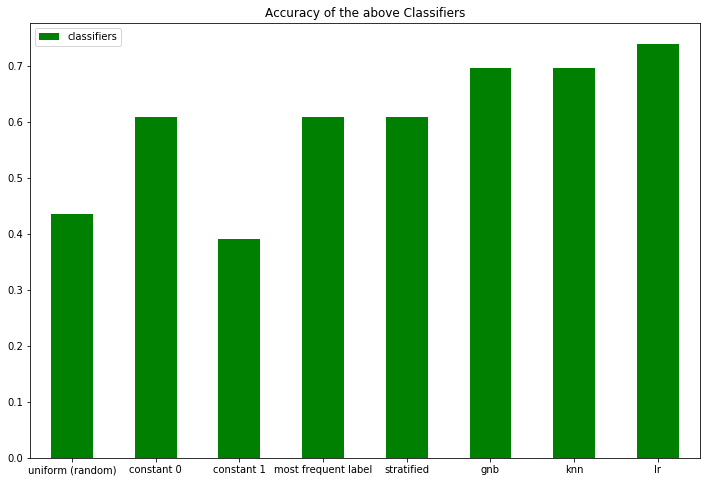

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'accuracy': class_accuracy.keys(), 'classifiers': class_accuracy.values()}, index =  class_accuracy.keys())
ax = df.plot.bar(rot=0, figsize=(12, 8), color='green', title='Accuracy of the above Classifiers')

### Σχολιασμός

Πιθανώς οι γραφικές να διαφέρουν σε περίπτωση που εκτελεστούν ξανά τα cells λόγω της τυχαιότητας. Εν προκειμένω,
- Ο Dummy Classifier του constant 0 εμφανίζεται πιο συχνά όπως και το most frequent. Έτσι, για τα δείγματα της κλάσης 0 επιτυγχάνονται καλύτερα αποτελέσματα της τάξης του 60%. Το uniform είναι περίπου 45% ενώ το stratified είναι 60%. Ο stratified δηλαδή, είναι πιο "έξυπνος" αφού μελετά την κατανομή των ετικετών στο training set και μετά προβλέπει με βάση το ποσοστό που πήρε για το κάθε label. Όμως, παρατηρείται ότι δεν μαθαίνει.
- Ανάμεσα στον Gaussian Classifier και στον kNN Classifier, φαίνεται να έχουν εξίσου καλά αποτελέσματα αν και στον GNB το κάθε χαρακτηριστικό είναι ανεξάρτητο ενώ στον kNN, επειδή χρειάζονται όλα τα δείγματα εκπαίδευσης, είναι πιο απαιτητικός.
- Τέλος, ο Logistic Regression ταξινομητής φαίνεται να είναι ο καλύτερος από όλους.

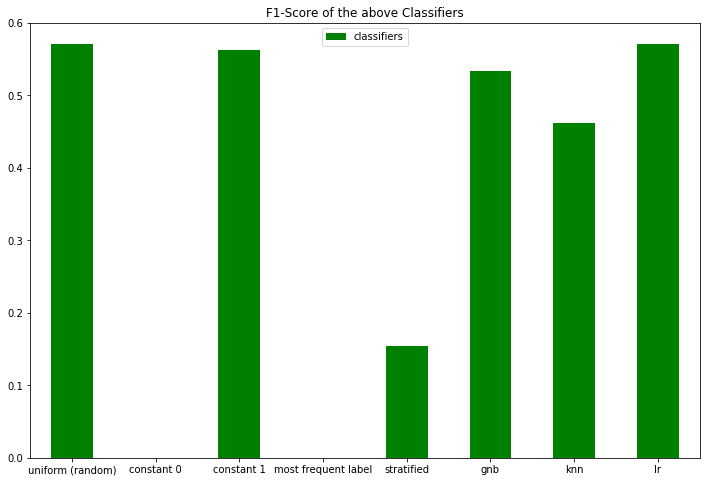

In [ ]:
df2 = pd.DataFrame({'f1-score': class_f1.keys(), 'classifiers': class_f1.values()}, index =  class_f1.keys())
ax2 = df2.plot.bar(rot=0, figsize=(12, 8), color='green', title='F1-Score of the above Classifiers')

### Σχολιασμός

Πιθανώς οι γραφικές να διαφέρουν σε περίπτωση που εκτελεστούν ξανά τα cells λόγω της τυχαιότητας. Εν προκειμένω,
- Ο Dummy Classifier του constant 1, εμφανίζεται περίπου στο 55% καθώς constant 0 και το most frequent απουσιάζουν. Το uniform είναι κι αυτό στο 55% και το stratified είναι περίπου στο 15%. Ο stratified δεν είναι πιο "έξυπνος".
- Ανάμεσα στον Gaussian Classifier και στον kNN Classifier, ο GNB είναι αρκετά καλύτερος εδώ.
- Τέλος, ο Logistic Regression ταξινομητής φαίνεται να είναι καλύτερος σε επίδοση από όλους και πάλι.

## **Βελτιστοποίηση**

Για όλους τους ταξινομητές βελτιστοποιήστε την επίδοσή τους μέσω των διαδικασιών
- προεπεξεργασίας
- ορισμού pipelines
- εύρεσης βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

Για το καλύτερο μοντέλο κάθε ταξινομητή, εκπαιδεύστε το στο σύνολο του train set και εκτιμήστε την επίδοσή του στο test set.Επιπρόσθετα, για τα βέλτιστα μοντέλα, καταγράψτε τους χρόνους train και test.

### Προεπεξεργασία

Στο παρόν data set υπάρχουν missing values οπότε απαιτείται η ανάλογη διαχείρισή τους. Αυτό το βήμα δεν είναι απαραίτητο βέβαια διότι στην συνέχεια θα χρησιμοποιήθούν έτοιμες συναρτήσεις για την βελτιστοποίηση.

Παρατηρήθηκε ότι για threshold >= 0.05 απορρίπονται λίγα χαρακτηριστικά οπότε επιλέχθηκε threshold = 0.2.

In [ ]:
selector = VarianceThreshold(threshold = 0.2) # initialization selector
train_reduced = selector.fit_transform(train) # fit
mask = selector.get_support() # mask selector to keep characteristics or not
test_reduced = test[:, mask]

print("Train set:", train.shape)
print("Reduced train set:", train_reduced.shape)
print("Test set:", test.shape)
print("Reduced test set:", test_reduced.shape)

Train set: (51, 7)
Reduced train set: (51, 4)
Test set: (23, 7)
Reduced test set: (23, 4)


### Κανονικοποίηση

Εφαρμόζεται κανονικοποίηση με standardization αφού threshold > 0 στο VarianceThreshold.

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

scaler = preprocessing.StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

### Εξισορρόποηση data set

In [ ]:
raovs = RandomOverSampler() # initialization

df = pd.Series(train_labels).value_counts().sort_index().reset_index()
print(df.to_string(index=False))
print("Shape of scaled Train set", train_scaled.shape)
print("Shape of Train labels: ", train_labels.shape)
print("")

train_resampled, train_labels_resampled = raovs.fit_resample(train_scaled,train_labels)

df = pd.Series(train_labels_resampled).value_counts().sort_index().reset_index()
print(df.to_string(index=False))
print("Shape of re-sampled Train set", train_resampled.shape)
print("Shape of re-sampled Train labels", train_labels_resampled.shape)

 index   0
   0.0  36
   1.0  15
Shape of scaled Train set (51, 4)
Shape of Train labels:  (51,)

 index   0
   0.0  36
   1.0  36
Shape of re-sampled Train set (72, 4)
Shape of re-sampled Train labels (72,)


Ακολούθως, ορίζεται η PCA και ο τελικός αριθμός features και εφαρμόζεται εκπαίδευση με τον ίδιο Μ/Σ.

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
n = 2
pca = PCA(n_components=n)
trainPCA = pca.fit_transform(train_resampled)
testPCA = pca.transform(test_scaled)

print("Shape of re-sampled Train set: ", train_resampled.shape)
print("Shape of PCA Train set: ", trainPCA.shape)
print("Shape of scaled Test set: ", test_scaled.shape)
print("Shape of PCA Test set: ", testPCA.shape)

Shape of re-sampled Train set:  (72, 4)
Shape of PCA Train set:  (72, 2)
Shape of scaled Test set:  (23, 4)
Shape of PCA Test set:  (23, 2)


## **Hyperparameter tuning και Βέλτιστες Αρχιτεκτονικές**

Ένα εκπαιδευμένο μοντέλο εκτιμητή (ταξινομητή) αποτελείται:
- απο την αρχιτεκτονική του (συνδυασμός μετασχηματιστών) και από την επιλογή του τελικού εκτιμητή (pipeline)
- από τις βέλτιστες τιμές των υπερ-παραμέτρων όλων των προηγουμένων που προκύπτουν από cross-validation

Σημειώνεται ότι σε κάθε πείραμα θα χρησιμοποιήσουμε 10-fold cross-validation.
Η μεθοδολογία που ακολουθήθηκε για την εύρεση της βέλτιστης αρχιτεκτονικής κάθε ταξινομητή είναι η "bottom-up". Αυτό σημαίνει ότι αρχικά υπήρχε μόνο ένας estimator και εν συνεχεία, θα προστέθηκαν μετασχηματιστές. Έπειτα, έγιναν δοκιμές σε διάφορα pipelines και με την χρήση predictions υπολογίστηκε το Accuracy και το F1-Score ώστε να βρεθεί ο βέλτιστος συνδυασμός. Μετά, με την GridSearchCV έγιναν δοκιμές για την βελτίωση ων υπερ-παραμέτρων. Επιπλέον, αν οι τιμές βρίσκονταν στα άκρα του διαστήματος αναζήτησης τότε προστέθηκαν τιμές ώστε η παράμετρος που προέκυπτε να βρίσκεται περίπου στο κέντρο του διαστήματος, ενώ αν η παράμετρος βρισκόταν στο κέντρο του διαστήματος της αναζήτησης τότε απορρίφθηκαν κάποιες από τις ακραίες τιμές και προστέθηκαν τιμές γύρω από εκείνη που προκρίθηκε προηγουμένως ως βέλτιστη και σε κάθε περίπτωση θα επαναλαμβάνεται το grid search, μέχρι να παρατηρηθεί κάποια σταθεροποίηση.  Επομένως, το καλύτερο μοντέλο κάθε ταξινομητή εκπαιδεύεται στο σύνολο του train set και υπολογίζεται η επίδοσή του στο test set.

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
raovs = RandomOverSampler()
pca = PCA()

train_variance = train.var(axis=0)
print("train variance: ", train_variance)
print("")
print(np.max(train_variance))

# dictionaries
time_train_f1 = {}
time_test_f1 = {}
time_train_acc = {}
time_test_acc = {}

train variance:  [7.47999388e+01 1.32256824e-01 1.22284980e-02 4.47175546e+01
 4.61539821e-01 2.35343505e+01 1.95049384e-01]

74.79993880278951


### **Dummy Classifier**

Θεωρήθηκε ότι ο Dummy Classifier δεν μαθαίνει οπότε η περαιτέρω επεξεργασία του κρίνεται άνευ σημασίας αφού δεν σχετίζεται με τα χαρακτηριστικά των δειγμάτων του και επομένως δεν μπορεί να βελτιστοποιηθεί.

### **Gaussian Naive Bayes (GNB) Classifier**

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

Η ακόλουθη συνάρτηση υπολογίζει το Accuracy & F1-score των pipelines με 10-fold-cross-validation


In [ ]:
def estim(pipe):
  pipe.fit(train, train_labels)
  
  score_acc = cross_val_score(pipe, train, train_labels, cv=10, scoring='accuracy')
  score_f1 = cross_val_score(pipe, train, train_labels, cv=10, scoring='f1')

  print("accuracy",score_acc.mean())
  print("f1-score:", score_f1.mean())
  print("")

In [ ]:
gnb = GaussianNB()
pipe_gnb = []

pipe_gnb.append(Pipeline(steps=[('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('pca', pca),('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('sampler', raovs),('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('scaler', scaler), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('selector', selector), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('sampler', raovs),('pca', pca), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('scaler', scaler),('pca', pca), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('scaler', scaler),('sampler', raovs), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('selector', selector),('scaler', scaler), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('scaler', scaler),('sampler', raovs),('pca', pca), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', raovs), ('gnb', gnb)],memory = 'tmp'))
pipe_gnb.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', raovs),('pca', pca), ('gnb', gnb)],memory = 'tmp'))

Μετά από δοκιμές, παρατηρήθηκε ότι το καλύτερο f1-score και accuracy προκύπτει με το pipeline 8. Όμως, προτιμάται η PCA αρχιτεκτονική 10.

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

pipe_gnb[9].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sampler', 'pca', 'gnb', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampler__random_state', 'sampler__sampling_strategy', 'sampler__shrinkage', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'gnb__priors', 'gnb__var_smoothing'])

### Accuracy (Ορθότητα)

In [ ]:
scalers = [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()]
n_components = list(np.arange(4,30,2))

In [ ]:
# GridSearch & f1-score
estimator = GridSearchCV(pipe_gnb[10], dict(scaler = scalers,pca__n_components = n_components), cv=10, scoring='accuracy', n_jobs=-1)
estimator.fit(train, train_labels)
print("Best Score ", estimator.best_score_)
print("")
print("Best estimator ", estimator.best_estimator_)

Best Score  0.78

Best estimator  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=4)), ('gnb', GaussianNB())])


In [ ]:
# best parameters
gnb_best = estimator.best_estimator_
print("GNB Classifier Best Parameters:", estimator.best_params_, "\n")
# accuracy
gnb_best.fit(train, train_labels)
preds_gnb_acc = gnb_best.predict(test)
print("Accuracy:", accuracy_score(test_labels, preds_gnb_acc))

GNB Classifier Best Parameters: {'pca__n_components': 4, 'scaler': StandardScaler()} 

Accuracy: 0.7391304347826086


### F1-Score

In [ ]:
scalers = [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()]
n_components = list(np.arange(4,30,2))

In [ ]:
# GridSearch & f1-score
estimator = GridSearchCV(pipe_gnb[10], dict(scaler = scalers,pca__n_components = n_components), cv=10, scoring='f1', n_jobs=-1)
estimator.fit(train, train_labels)
print("Best Score ",estimator.best_score_)
print("Best estimator ", estimator.best_estimator_)

Best Score  0.5800000000000001
Best estimator  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=4)), ('gnb', GaussianNB())])


In [ ]:
# best parameters
gnb_best = estimator.best_estimator_
print("GNB Classifier Best Parameters:", estimator.best_params_, "\n")
# f1-score
gnb_best.fit(train, train_labels)
preds_gnb_f1 = gnb_best.predict(test)
print("F1-Score:", f1_score(test_labels,preds_gnb_f1))

GNB Classifier Best Parameters: {'pca__n_components': 4, 'scaler': MinMaxScaler()} 

F1-Score: 0.5555555555555556


### Σχολιασμός:

Για τον GNB, παρατηρείται ότι accuracy είναι ελαφρώς καλύτερο. Επιπλέον ο MaxAbsScaler() scaler φαίνεται να είναι η καλύτερη επιλογή στο συγκεκριμένο πείραμα.


## **k-Neirest Neighbors (kNN) Classifier**

In [ ]:
from sklearn import neighbors

In [ ]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1) 
pipe_knn = []

pipe_knn.append(Pipeline(steps=[ ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('pca', pca),('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('sampler', raovs),('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('scaler', scaler), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('selector', selector), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('sampler', raovs),('pca', pca), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('scaler', scaler),('sampler', raovs), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('selector', selector),('sampler', raovs), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('selector', selector),('scaler', scaler), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('scaler', scaler),('sampler', raovs),('pca', pca), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', raovs), ('knn', clf)],memory = 'tmp'))
pipe_knn.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', raovs),('pca', pca), ('knn', clf)],memory = 'tmp'))

Μετά από δοκιμές, παρατηρήθηκε ότι το καλύτερο f1-score και accuracy προκύπτει με το pipeline 11.

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

pipe_knn[11].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selector', 'scaler', 'sampler', 'knn', 'selector__threshold', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampler__random_state', 'sampler__sampling_strategy', 'sampler__shrinkage', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

### Accuracy (Ορθότητα)

In [ ]:
scalers = [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()]
n_components = [1,2,3,4,5,6,7,8]
n_neighbors = list(np.arange(4,20,5))
distance = ['euclidean','manhattan','chebyshev']
vthreshold = [0.01, 0.1, 1, 10]

In [ ]:
# GridSearch & f1-score
estimator = GridSearchCV(pipe_knn[11], dict(selector__threshold=vthreshold,scaler = scalers,knn__metric = ['manhattan'],knn__n_neighbors = n_neighbors), cv=10, scoring='accuracy', n_jobs=-1)
estimator.fit(train, train_labels)
print("Best Score ",estimator.best_score_)
print("")
print("Best estimator ", estimator.best_estimator_)

Best Score  0.8400000000000001

Best estimator  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=14))])


In [ ]:
# best parameters
knn_best = estimator.best_estimator_
print("kNN Classifier Best Parameters:", estimator.best_params_, "\n")
# accuracy
knn_best.fit(train,train_labels)
preds_knn_acc = knn_best.predict(test)
print("Accuracy:", accuracy_score(test_labels, preds_knn_acc))

kNN Classifier Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 14, 'scaler': MinMaxScaler(), 'selector__threshold': 1} 

Accuracy: 0.7391304347826086


### F1-Score

In [ ]:
scalers = [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()]
n_components = [8,10,12,14,16,18]
n_neighbors = list(np.arange(4,20,5))
distance = ['euclidean','manhattan','chebyshev']
vthreshold = [0.01, 0.1, 1, 10]

In [ ]:
# GridSearch & f1-score
estimator = GridSearchCV(pipe_knn[11], dict(selector__threshold=vthreshold,scaler = scalers,knn__metric = ['manhattan'],knn__n_neighbors = n_neighbors), cv=10, scoring='f1', n_jobs=-1)
estimator.fit(train, train_labels)
print("Best Score ",estimator.best_score_)
print("")
print("Best estimator ", estimator.best_estimator_)

Best Score  0.7266666666666668

Best estimator  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=19))])


In [ ]:
# best parameters
knn_best = estimator.best_estimator_
print("kNN Classifier Best Parameters:", estimator.best_params_, "\n")
# f1-score
knn_best.fit(train,train_labels)
preds_knn_f1 = knn_best.predict(test)
print("F1-Score:", f1_score(test_labels, preds_knn_f1))

kNN Classifier Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'scaler': StandardScaler(), 'selector__threshold': 0.1} 

F1-Score: 0.5333333333333333


### Σχολιασμός:

H μετρική manhattan επικράτησε καθώς στόχος ήταν η σύντομη εκτέλεση αφού για άλλες παραμέτρους θα ήταν σαφώς αυξημένος.

## **Λογιστική Παλινδρόμηση (Logistic Regression) (LR)**

In [ ]:
logistic = LogisticRegression(max_iter=500)
pipe_lr = []

pipe_lr.append(Pipeline(steps=[("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('pca', pca), ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('sampler', raovs), ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('scaler', scaler),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('selector', selector),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('sampler', raovs),('pca', pca),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('scaler', scaler),('sampler', raovs),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('selector', selector),('sampler', raovs),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('selector', selector),('scaler', scaler),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('scaler', scaler),('sampler', raovs),('pca', pca),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('pca', pca),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', raovs),  ("logistic", logistic)],memory = 'tmp'))
pipe_lr.append(Pipeline(steps=[('selector', selector),('scaler', scaler),('sampler', raovs),('pca', pca),  ("logistic", logistic)],memory = 'tmp'))

Θα χρησιμοποιηθεί το Pipeline 10 για f1-score και για accuracy. 

Για τις υπερπαραμέτρους, βρέθηκαν οι solvers ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ και καταλληλότερος φαίνεται να είναι ο liblinear.

In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

pipe_lr[9].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sampler', 'pca', 'logistic', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sampler__random_state', 'sampler__sampling_strategy', 'sampler__shrinkage', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

### Accuracy (Ορθότητα)

In [ ]:
threshold = list(np.arange(0,1,0.1))
scalers = [StandardScaler(), MinMaxScaler(),Normalizer(), MaxAbsScaler()]
n_components = list(np.arange(4,30,2))
penalty = ['l1', 'l2']

In [ ]:
# GridSearch & f1-score
estimator = GridSearchCV(pipe_lr[10], dict(scaler = scalers,pca__n_components=n_components,logistic__solver = ['liblinear'],logistic__penalty = penalty), cv=10, scoring='accuracy', n_jobs=-1)
estimator.fit(train, train_labels)
print("Best Score ",estimator.best_score_)
print("Best estimator ", estimator.best_estimator_)

Best Score  0.82
Best estimator  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('logistic',
                 LogisticRegression(max_iter=500, penalty='l1',
                                    solver='liblinear'))])


In [ ]:
# best parameters
lr_best = estimator.estimator
print("lr Classifier Best Parameters:", estimator.best_params_, "\n")
# accuracy
lr_best.fit(train, train_labels)
preds_lr_acc = lr_best.predict(test)
print("Accuracy:", accuracy_score(test_labels,preds_lr_acc))

lr Classifier Best Parameters: {'logistic__penalty': 'l1', 'logistic__solver': 'liblinear', 'pca__n_components': 4, 'scaler': StandardScaler()} 

Accuracy: 0.7391304347826086


### F1-Score

In [ ]:
scalers = [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()]
penalty = ['l1', 'l2']
n_components = list(np.arange(4,30,2))
threshold = list(np.arange(0,1,0.1))

In [ ]:
# GridSearch & f1-score
estimator = GridSearchCV(pipe_lr[10], dict(selector__threshold=threshold,scaler = scalers,pca__n_components=n_components,logistic__solver = ['liblinear'],logistic__penalty = penalty), cv=10, scoring='f1', n_jobs=-1)
estimator.fit(train, train_labels)
print("Best Score ",estimator.best_score_)
print("")
print("Best estimator ", estimator.best_estimator_)

Best Score  0.6933333333333334

Best estimator  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('logistic',
                 LogisticRegression(max_iter=500, solver='liblinear'))])


In [ ]:
# best parameters
lr_best = estimator.best_estimator_
print("lr Classifier Best Parameters:", estimator.best_params_, "\n")
# f1-score
lr_best.fit(train, train_labels)
preds_lr_f1 = lr_best.predict(test)
print("F1-Score:", f1_score(test_labels, preds_lr_f1))

lr Classifier Best Parameters: {'logistic__penalty': 'l2', 'logistic__solver': 'liblinear', 'pca__n_components': 4, 'scaler': StandardScaler(), 'selector__threshold': 0.1} 

F1-Score: 0.5714285714285714


## **Παρουσίαση & Σύγκριση Επιδόσεων Βέλτιστων Αρχιτεκτονικών**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.DataFrame(np.array([['Naive Bayes Classifier',accuracy_score(test_labels,preds_gnb_acc) ,accuracy_score(test_labels,preds_gnb_acc) - class_accuracy['gnb']],
                            ['K-Nearest Neighbors',accuracy_score(test_labels,preds_knn_acc),accuracy_score(test_labels,preds_knn_acc) - class_accuracy['knn']],
                            ['Logistic Regression',accuracy_score(test_labels,preds_lr_acc),accuracy_score(test_labels,preds_lr_acc) - class_accuracy['lr']]]),
                   columns=['Estimator', 'Accuracy Optimized', 'Out-of-the-box difference'])
df

,Estimator,Accuracy Optimized,Out-of-the-box difference
0,Naive Bayes Classifier,0.7391304347826086,0.04347826086956519
1,K-Nearest Neighbors,0.7391304347826086,0.04347826086956519
2,Logistic Regression,0.7391304347826086,0.0


In [ ]:
df = pd.DataFrame(np.array([['Naive Bayes Classifier',f1_score(test_labels,preds_gnb_f1) ,f1_score(test_labels,preds_gnb_f1) - class_f1['gnb']],
                            ['K-Nearest Neighbors',f1_score(test_labels,preds_knn_f1),f1_score(test_labels,preds_knn_f1) - class_f1['knn']],
                            ['Logistic Regression',f1_score(test_labels,preds_lr_f1),f1_score(test_labels,preds_lr_f1) - class_f1['lr']]]),
                   columns=['Estimator', 'F1-Score Optimized', 'Out-of-the-box difference'])
df

,Estimator,F1-Score Optimized,Out-of-the-box difference
0,Naive Bayes Classifier,0.5555555555555556,0.022222222222222254
1,K-Nearest Neighbors,0.5333333333333333,0.07179487179487176
2,Logistic Regression,0.5714285714285714,0.0


### Σχολιασμός:

Από τους πίνακες είναι φανερό ότι επιτεύχθηκε βελτιστοποίηση σε όλους τους ταξινομητές.

Η μεγαλύτερη βελτιστοποίηση ήταν για την μετρική Accuracy ο kNN.

Η μεγαλύτερη βελτιστοποίηση ήταν για την μετρική F1-Score ο kNN.

Η βελτίωση σε όλους τους ταξινομητές ήταν αναμενόμενη αλλά τα ποσοστά είναι της τάξης του 1% - 5% και αυτό συμβαίνει διότι υπήρχαν ήδη καλά ποσοστά στο out-of-the-box για τα δεδομένα του data set.


Επιπλέον, παρατηρείται ότι ο "χειρότερος" φαίνεται να είναι ο LR ενώ ο "καλύτερος" ο kNN. Επομένως, αυτός που προτείνεται είναι ο kNN καθώς παρουσιάζει την μεγαλύτερη βελτιστοποίηση τόσο για Accuracy όσο και για F1-Score.